In [1]:
import numpy as np                    # Libreria per usare gli array (più efficienti delle liste)
import matplotlib.pyplot as plt       # Libreria per i grafici
from scipy import integrate           # Libreria per integrare
from scipy.optimize import curve_fit  # Libreria per fare i fit
from matplotlib.pyplot import cm      # Libreria per colorare gli istogrammi (FraClozza!!!!!!!!!)

In [ ]:
ch = np.loadtxt("run.txt", usecols = (0,1), comments ="#") 

In [ ]:
#ch = dati[np.where(dati[:,2]==1)]
#ch = [dati[np.where(dati[:,0]==i)] for i in range(16)]
#ch = np.array([ch[i][:,1] for i in range(16)])
i=ch.shape[0]-1
while(i>=0):
    for j in range(15):
        if(ch[i-j,0]==ch[r,0]):
            ch[r,1]+=ch[r-j,1]
            ch[r-j,1]=0
    i-=1

In [17]:
ch[:100]

array([[  0.     ,  59.7384 ],
       [  0.     ,   0.     ],
       [  1.     ,   0.     ],
       [  1.     ,   0.     ],
       [  2.     ,   0.     ],
       [  3.     ,   0.     ],
       [  4.     ,   0.     ],
       [  4.     ,   0.     ],
       [  5.     ,   0.     ],
       [  5.     ,   0.     ],
       [  6.     ,   0.     ],
       [  7.     ,   0.     ],
       [  7.     ,   0.     ],
       [  8.     ,   0.     ],
       [  8.     ,   0.     ],
       [  9.     ,   0.     ],
       [  9.     ,   8.11633],
       [ 10.     ,  39.0122 ],
       [ 10.     ,  19.5441 ],
       [ 11.     ,  38.0655 ],
       [ 11.     ,   9.03419],
       [ 12.     , 102.621  ],
       [ 13.     ,  49.3719 ],
       [ 13.     ,  20.586  ],
       [ 14.     , 436.812  ],
       [ 14.     ,  20.5908 ],
       [ 15.     , 229.165  ],
       [  0.     , 155.675  ],
       [  1.     , 148.005  ],
       [  2.     ,  58.9539 ],
       [  3.     ,  19.3938 ],
       [  3.     ,  13.9501 ],
       [

In [5]:
ch = ch[np.where(ch[:,1]!=0)]
ch = ch[:,:2]
ch = np.array([ch[np.where(ch[:,0]==i)] for i in range(16)])
ch = np.array([ch[i][:,1] for i in range(16)])

/tmp/ipykernel_11317/3977887897.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ch = np.array([ch[np.where(ch[:,0]==i)] for i in range(16)])
/tmp/ipykernel_11317/3977887897.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ch = np.array([ch[i][:,1] for i in range(16)])


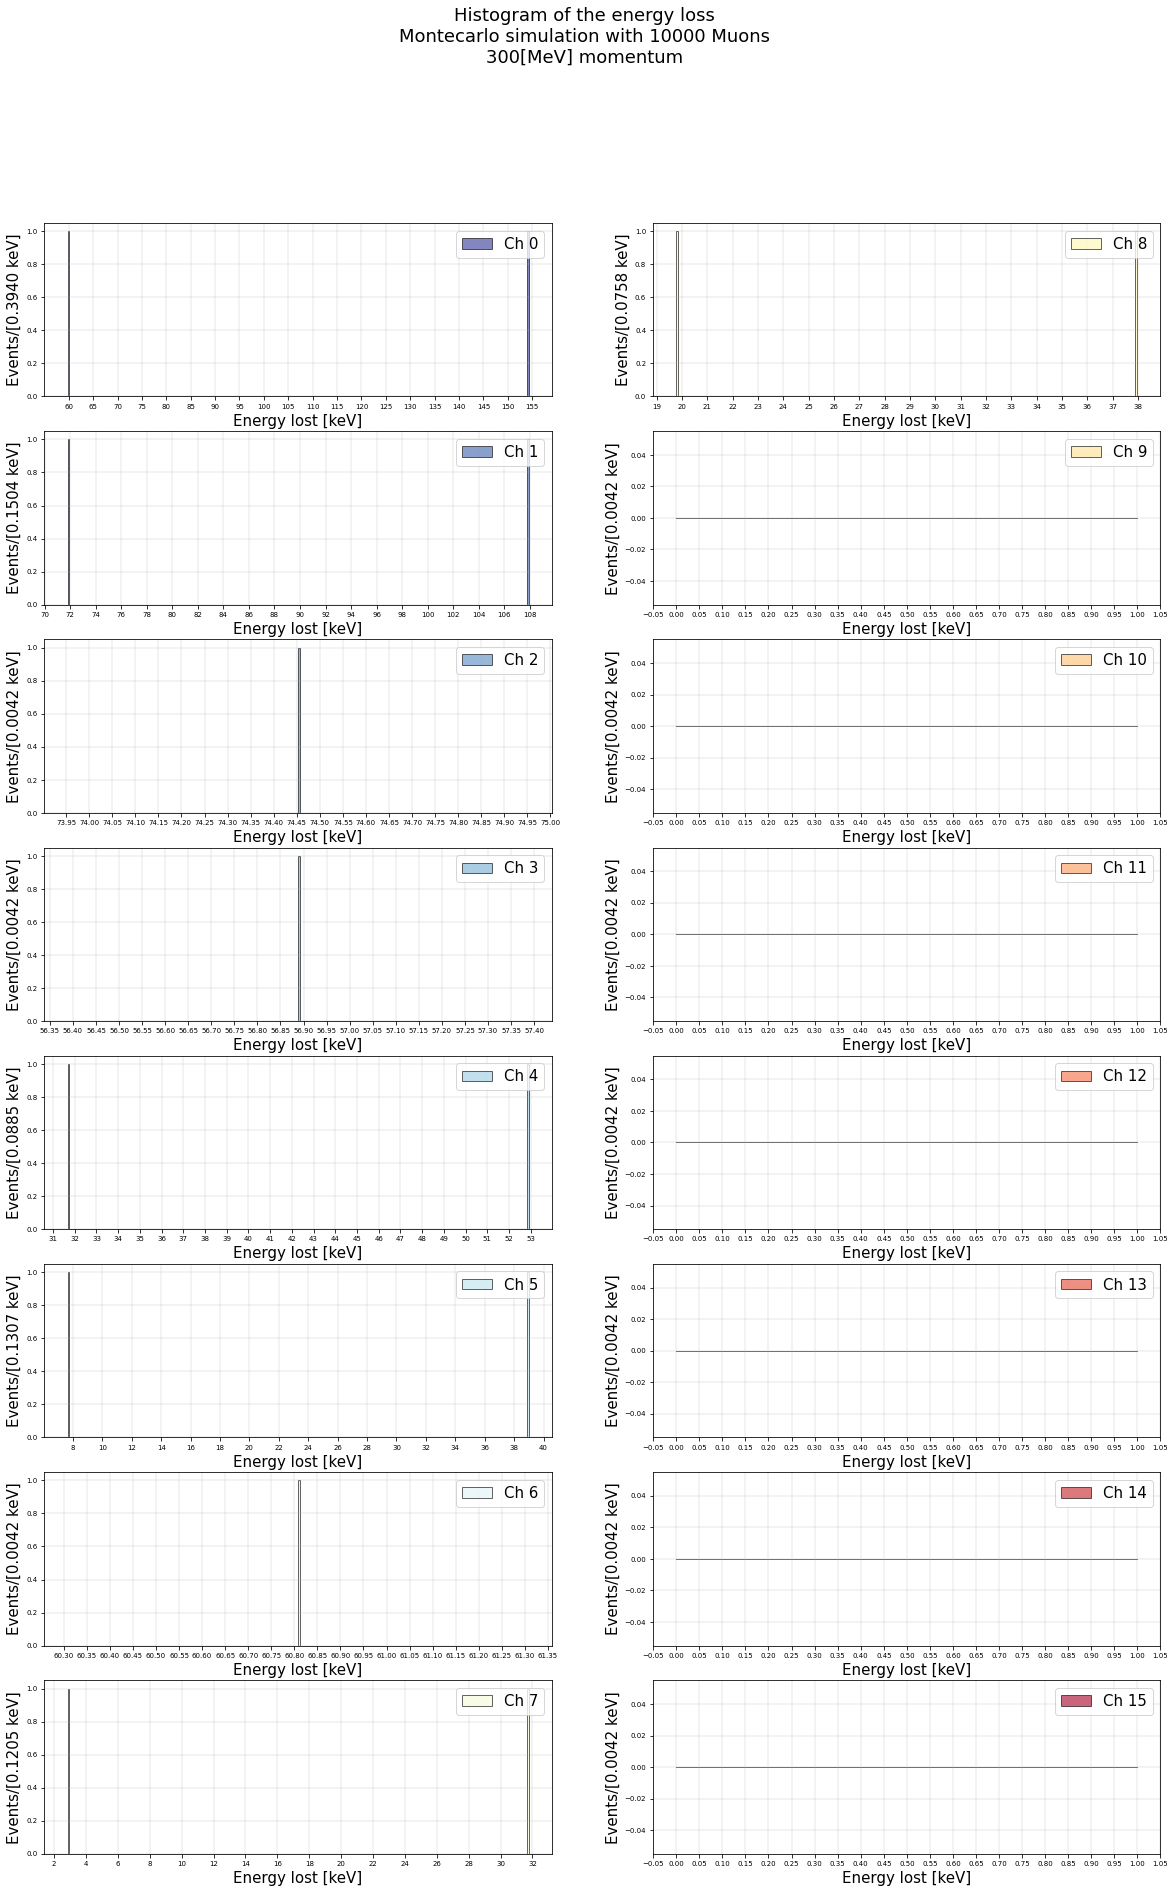

In [6]:
fig, axes = plt.subplots(8,2, figsize=(20, 30), sharex = False, sharey = False)
plt.rc('font', size = 15) 
N_bins = 240
n_muons = 10000
plt.suptitle("Histogram of the energy loss\n"
            "Montecarlo simulation with %.d Muons\n300[MeV] momentum"%(n_muons))
tipo = "stepfilled" # step, bar o stepfilled per il tipo di istogramma
labsize = 7
labfontsize = 15
col = iter(cm.RdYlBu_r(np.linspace(0,1,16))) # Colore istogramma da fittare
lw_fitted = 1  # Spessore istogramma da fittare
xmin=-1
xmax=1000
ymin=0
ymax = 2000
alfa = 0.6
channel = 0
for column in range(2):
    for r in range(8): 
        c = next(col)
        n, bins, _ = axes[r][column].hist(ch[channel], bins = N_bins, alpha = alfa,  label = "Ch %d" %(channel), lw = lw_fitted, color = c, histtype=tipo, edgecolor = 'black')
        Amp_bin = bins[1]-bins[0]
        axes[r][column].set_ylabel(r"Events/[%.4f keV]"%(Amp_bin), fontsize = labfontsize)
        axes[r][column].set_xlabel(r"Energy lost [keV]", fontsize=labfontsize)
        axes[r][column].legend()
        axes[r][column].locator_params(axis='x', nbins=30) 
        axes[r][column].grid(lw=0.3)
        axes[r][column].tick_params(axis='both', labelsize=labsize)
        channel+=1
plt.savefig('EnergyMontecarlo_40deg_58.675k_1.pdf')